In [2]:
!pip install xlrd
# !pip install openpyxl  # 최신 xlsx 사용 (실행X)

In [3]:
from hdfs import InsecureClient
from io import BytesIO
import pandas as pd

In [5]:
hdfs = InsecureClient('http://namenode:9870',user="hadoop")
hdfs_path ='/user/hadoop/upload_oil/'

file_list = hdfs.list(hdfs_path)
datas = []
for n in file_list:
    # print(hdfs_path + n) 
    with hdfs.read(hdfs_path + n) as reader:
        raw_data = reader.read() # 전체 내용을 바이트로 읽음
        buffer = BytesIO(raw_data)
        df = pd.read_excel(buffer, skiprows=2, engine="xlrd")
        datas.append(df)
total = pd.concat(datas)
total

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,부산광역시,한길주유소 금사점 한솔유화㈜,부산 금정구 반송로 420 (금사동),HD현대오일뱅크,051-524-6642,Y,1897,1549,1419,-
1,부산광역시,은마석유 노포주유소,부산 금정구 중앙대로 2191 (노포동),GS칼텍스,051-508-1645,Y,1849,1575,1437,1350
2,부산광역시,훼미리알뜰주유소,부산 금정구 두실로 2,알뜰주유소,051-582-5882,Y,-,1575,1437,-
3,부산광역시,청룡명품주유소,부산 금정구 중앙대로 2130,HD현대오일뱅크,051-508-5150,Y,-,1575,1437,-
4,부산광역시,금두꺼비주유소,부산광역시 금정구 부곡로 67 (부곡동),알뜰주유소,051-583-6433,Y,-,1587,1457,-
...,...,...,...,...,...,...,...,...,...,...
46,부산광역시,명지주유소,부산 강서구 낙동남로 1042,SK에너지,051-271-2828,N,-,1678,1558,1500
47,부산광역시,만선주유소,부산 강서구 가락대로210번길 102,HD현대오일뱅크,051-831-9171,N,-,1698,1558,-
48,부산광역시,비케이원(주) 미래드림주유소,부산 강서구 가락대로 649,HD현대오일뱅크,051-974-0808,Y,-,1709,1559,-
49,부산광역시,대양산업(주)대양가덕주유소,부산 강서구 거가대로 2571,GS칼텍스,051-715-2201,Y,-,1788,1638,1400


In [6]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, 0 to 50
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      347 non-null    object
 1   상호      347 non-null    object
 2   주소      347 non-null    object
 3   상표      347 non-null    object
 4   전화번호    347 non-null    object
 5   셀프여부    347 non-null    object
 6   고급휘발유   347 non-null    object
 7   휘발유     347 non-null    object
 8   경유      347 non-null    object
 9   실내등유    347 non-null    object
dtypes: object(10)
memory usage: 29.8+ KB


In [7]:
total = total[['상표','상호','주소','휘발유','셀프여부']]
total

,상표,상호,주소,휘발유,셀프여부
0,HD현대오일뱅크,한길주유소 금사점 한솔유화㈜,부산 금정구 반송로 420 (금사동),1549,Y
1,GS칼텍스,은마석유 노포주유소,부산 금정구 중앙대로 2191 (노포동),1575,Y
2,알뜰주유소,훼미리알뜰주유소,부산 금정구 두실로 2,1575,Y
3,HD현대오일뱅크,청룡명품주유소,부산 금정구 중앙대로 2130,1575,Y
4,알뜰주유소,금두꺼비주유소,부산광역시 금정구 부곡로 67 (부곡동),1587,Y
...,...,...,...,...,...
46,SK에너지,명지주유소,부산 강서구 낙동남로 1042,1678,N
47,HD현대오일뱅크,만선주유소,부산 강서구 가락대로210번길 102,1698,N
48,HD현대오일뱅크,비케이원(주) 미래드림주유소,부산 강서구 가락대로 649,1709,Y
49,GS칼텍스,대양산업(주)대양가덕주유소,부산 강서구 거가대로 2571,1788,Y


In [8]:
total2 = total.copy()
total2['구'] = [addr.split()[1] for addr in total2['주소']]
total2.sample(7)

,상표,상호,주소,휘발유,셀프여부,구
18,SK에너지,대창제1주유소,부산 사하구 을숙도대로 821,1639,Y,사하구
42,HD현대오일뱅크,명품주유소,부산 강서구 대저로 283 (대저1동),1658,N,강서구
22,SK에너지,SK에너지(주) 돌고래주유소,부산 해운대구 해운대로573번길 16,1598,N,해운대구
6,SK에너지,부경셀프주유소,부산 기장군 기장읍 반송로 1407,1565,Y,기장군
18,SK에너지,기분조은주유소,부산 기장군 정관면 정관로 787,1580,Y,기장군
15,SK에너지,서부산IC주유소,부산 사상구 학감대로 170,1564,Y,사상구
13,SK에너지,양천석유(주)덕진셀프주유소반송점,부산 해운대구 반송로 782,1574,Y,해운대구


In [9]:
validation =  total2['구'].unique()
print(validation,len(validation))

['금정구' '서구' '수영구' '연제구' '영도구' '중구' '해운대구' '기장군' '남구' '동구' '동래구' '부산진구'
 '북구' '사상구' '사하구' '강서구'] 16


In [10]:
# 결측값 제거
# total2[total2['휘발유'].isna()]
total2 = total2[total2['휘발유'] != '-']
total3 = total2.copy()
# total2[total2['휘발유'] == '-']

In [11]:
total2.info()
total3['휘발유'] = pd.to_numeric(total3['휘발유'], errors='coerce')
total3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 50
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상표      343 non-null    object
 1   상호      343 non-null    object
 2   주소      343 non-null    object
 3   휘발유     343 non-null    object
 4   셀프여부    343 non-null    object
 5   구       343 non-null    object
dtypes: object(6)
memory usage: 18.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 50
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상표      343 non-null    object
 1   상호      343 non-null    object
 2   주소      343 non-null    object
 3   휘발유     343 non-null    int64 
 4   셀프여부    343 non-null    object
 5   구       343 non-null    object
dtypes: int64(1), object(5)
memory usage: 18.8+ KB


In [15]:
# os에 있는 사용가능한 폰트 나열
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
import seaborn as sns

Text(0.2, 0.4, '한글')

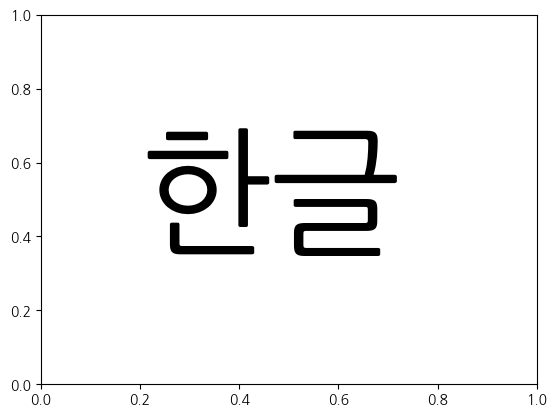

In [16]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothicLight.otf"
font_name = fm.FontProperties(fname = path).get_name()
rc("font", family = font_name)
plt.text(0.2, 0.4, "한글", size=100)

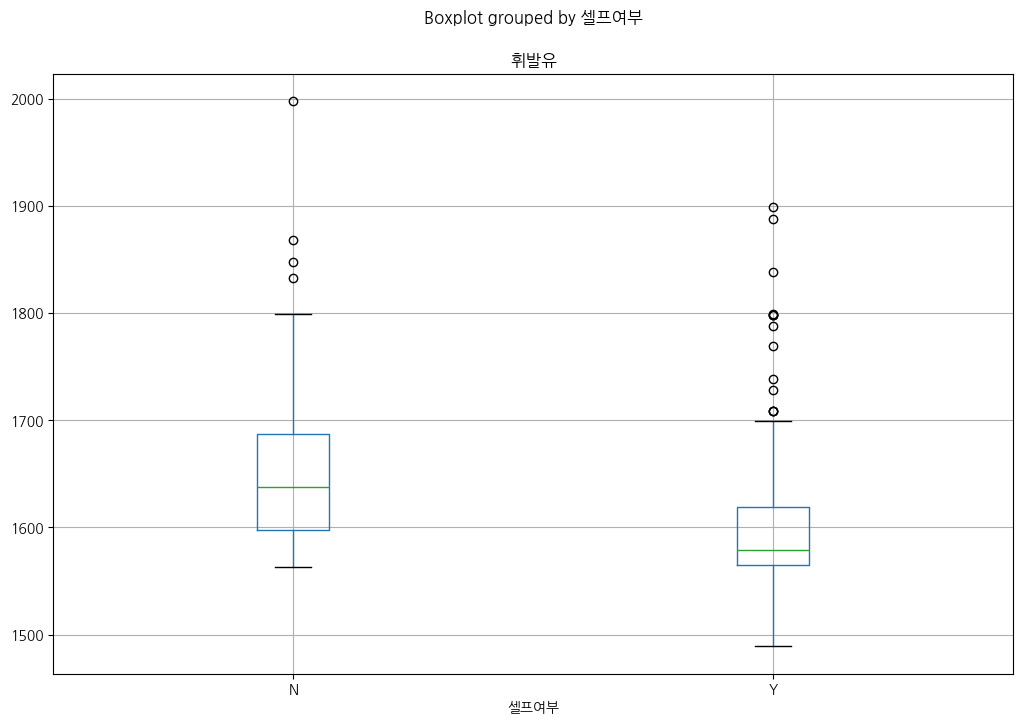

In [17]:
total3.boxplot(column="휘발유", by="셀프여부", figsize=(12,8))
plt.show()

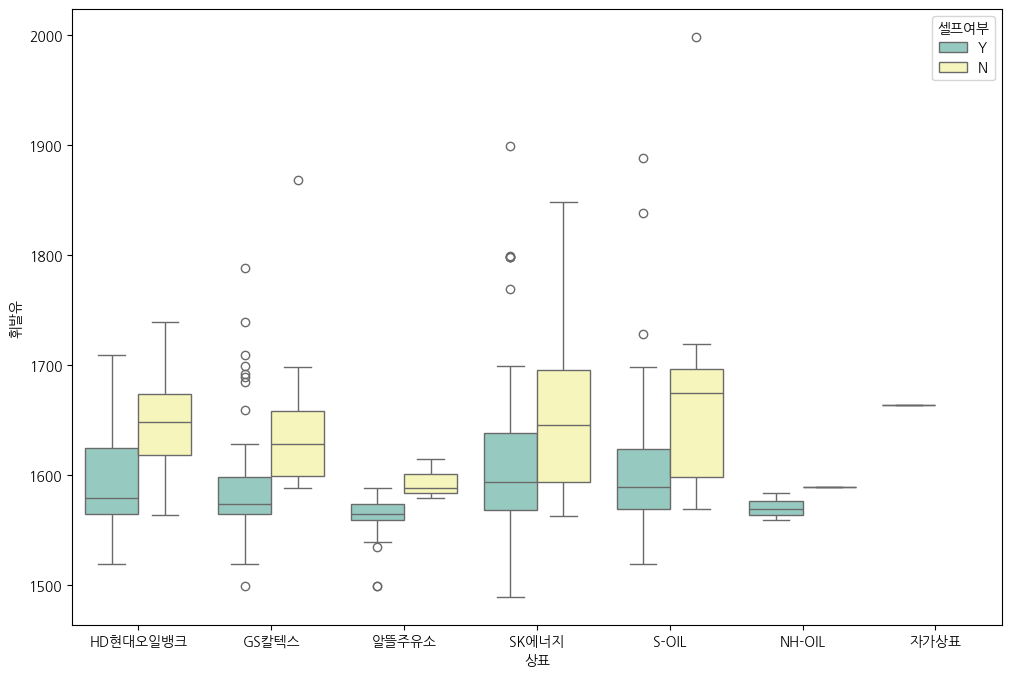

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="휘발유", hue="셀프여부", data=total3, palette="Set3")
plt.show()

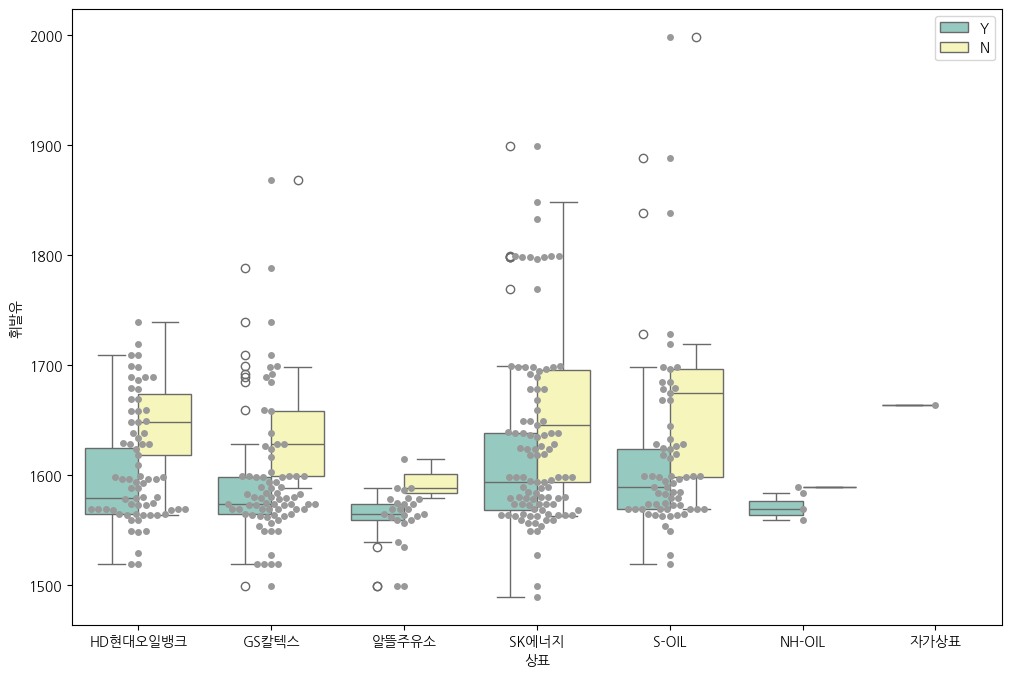

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="휘발유", hue="셀프여부", data=total3, palette="Set3")
sns.swarmplot(x="상표", y="휘발유", data=total3, color=".6")
plt.show()

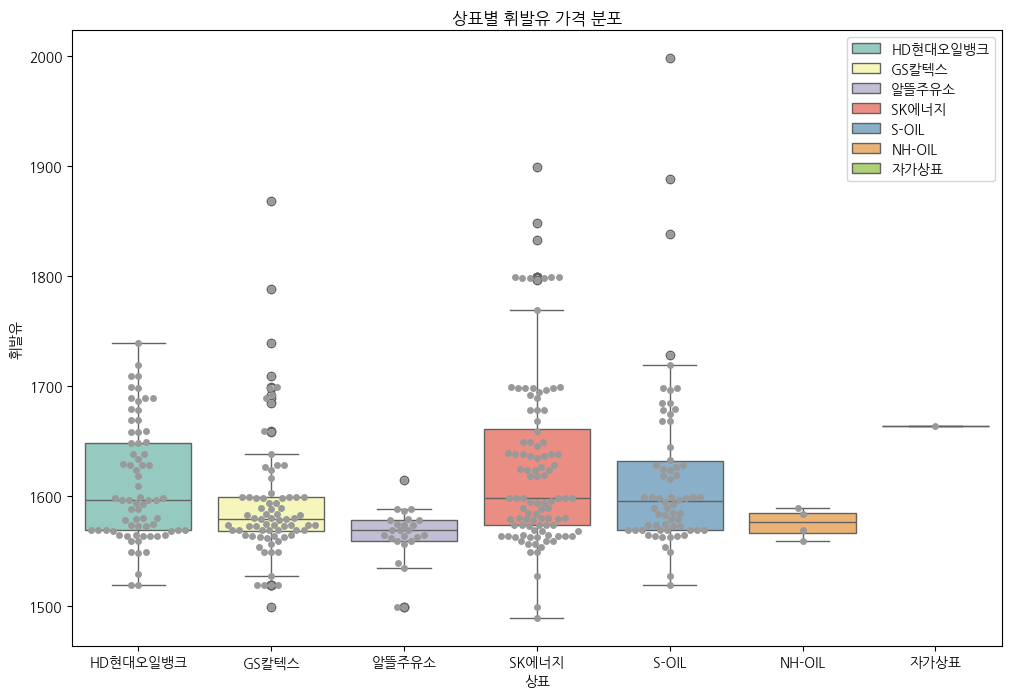

In [21]:
plt.figure(figsize=(12,8))
# 박스플롯
sns.boxplot(x="상표", y="휘발유", hue="상표", data=total3, palette="Set3", legend=True)
# 스윙플롯
sns.swarmplot(x="상표", y="휘발유", data=total3, color=".6")

plt.title("상표별 휘발유 가격 분포")
plt.show()